# 1.1. Описание проекта 

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.\

Вам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# 1.2. Инструкция по выполнению проекта

Загрузите и подготовьте данные. Поясните порядок действий.\
Обучите и проверьте модель для каждого региона:
- 2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
- 2.2. Обучите модель и сделайте предсказания на валидационной выборке.
- 2.3. Сохраните предсказания и правильные ответы на валидационной выборке.
- 2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
- 2.5. Проанализируйте результаты.\
Подготовьтесь к расчёту прибыли:
- 3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
- 3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.
- 3.3. Напишите выводы по этапу подготовки расчёта прибыли.\
Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
- 4.1. Выберите скважины с максимальными значениями предсказаний.
- 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
- 4.3. Рассчитайте прибыль для полученного объёма сырья.\
Посчитайте риски и прибыль для каждого региона:
- 5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- 5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
- 5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

# 1.3. Описание данных

id — уникальный идентификатор скважины;\
f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);\
product — объём запасов в скважине (тыс. баррелей).

# 1.4. Условие задачи

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.\
Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

# 2. Загрузка и подготовка данных

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [181]:
df0, df1, df2 = [pd.read_csv(f'geo_data_{i}.csv') for i in range(3)]
df0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [182]:
df = []
df.append(df0)
df.append(df1)
df.append(df2)

In [183]:
df[0] = df[0].drop(['id'], axis=1)

In [184]:
df[1] = df[1].drop(['id'], axis=1)
df[2] = df[2].drop(['id'], axis=1)

In [185]:
df

[             f0        f1        f2     product
 0      0.705745 -0.497823  1.221170  105.280062
 1      1.334711 -0.340164  4.365080   73.037750
 2      1.022732  0.151990  1.419926   85.265647
 3     -0.032172  0.139033  2.978566  168.620776
 4      1.988431  0.155413  4.751769  154.036647
 ...         ...       ...       ...         ...
 99995  0.971957  0.370953  6.075346  110.744026
 99996  1.392429 -0.382606  1.273912  122.346843
 99997  1.029585  0.018787 -1.348308   64.375443
 99998  0.998163 -0.528582  1.583869   74.040764
 99999  1.764754 -0.266417  5.722849  149.633246
 
 [100000 rows x 4 columns],
               f0         f1        f2     product
 0     -15.001348  -8.276000 -0.005876    3.179103
 1      14.272088  -3.475083  0.999183   26.953261
 2       6.263187  -5.948386  5.001160  134.766305
 3     -13.081196 -11.506057  4.999415  137.945408
 4      12.702195  -8.147433  5.004363  134.766305
 ...          ...        ...       ...         ...
 99995   9.535637  -6.878

In [186]:
df0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


df0
----------------------------------------
         f0        f1        f2     product
0  0.705745 -0.497823  1.221170  105.280062
1  1.334711 -0.340164  4.365080   73.037750
2  1.022732  0.151990  1.419926   85.265647
3 -0.032172  0.139033  2.978566  168.620776
4  1.988431  0.155413  4.751769  154.036647
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None
----------------------------------------
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832   

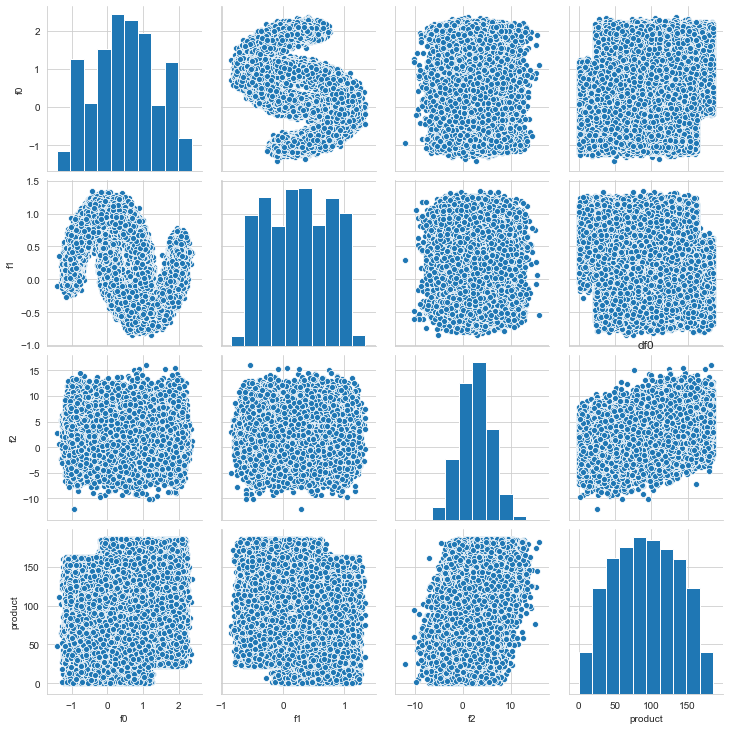

None
df1
----------------------------------------
          f0         f1        f2     product
0 -15.001348  -8.276000 -0.005876    3.179103
1  14.272088  -3.475083  0.999183   26.953261
2   6.263187  -5.948386  5.001160  134.766305
3 -13.081196 -11.506057  4.999415  137.945408
4  12.702195  -8.147433  5.004363  134.766305
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None
----------------------------------------
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std   

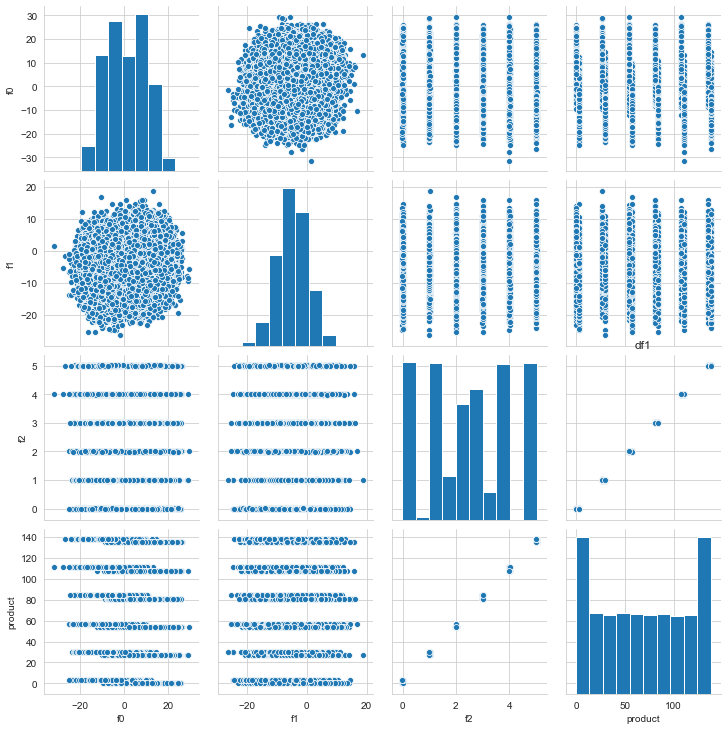

None
df2
----------------------------------------
         f0        f1        f2     product
0 -1.146987  0.963328 -0.828965   27.758673
1  0.262778  0.269839 -2.530187   56.069697
2  0.194587  0.289035 -5.586433   62.871910
3  2.236060 -0.553760  0.930038  114.572842
4 -0.515993  1.716266  5.899011  149.600746
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None
----------------------------------------
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.7320

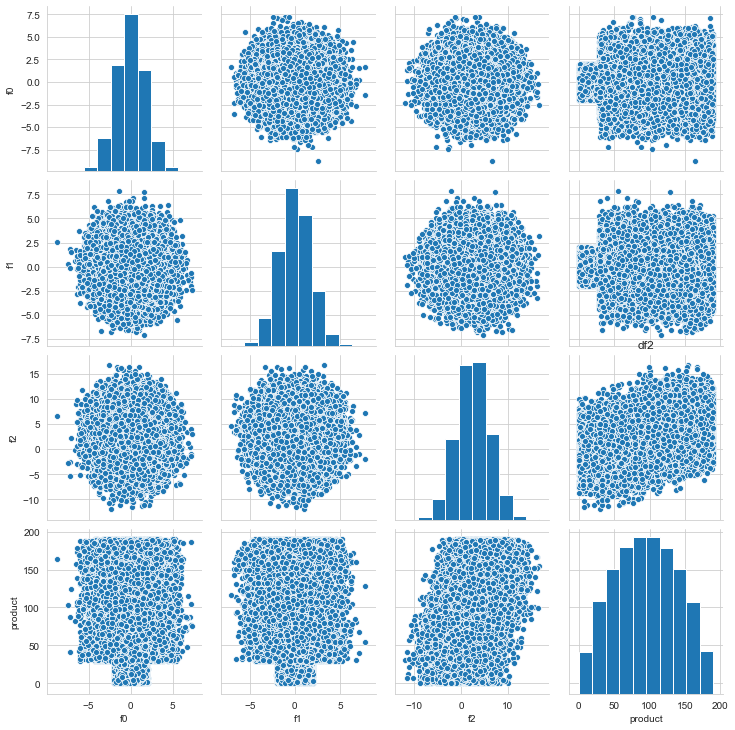

None


In [187]:
for i in range(0,3):
    print(f'df{i}' + '\n' + '-' * 40)
    print(df[i].head())
    print('-' * 40)
    print(df[i].info())
    print('-' * 40)
    print(df[i].describe())
    print('-' * 50)
    print(df[i].corr())
    print('-' * 50)
    print(sns.pairplot(df[i]))
    print(plt.title(f'df{i}'))
    print(plt.show())

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

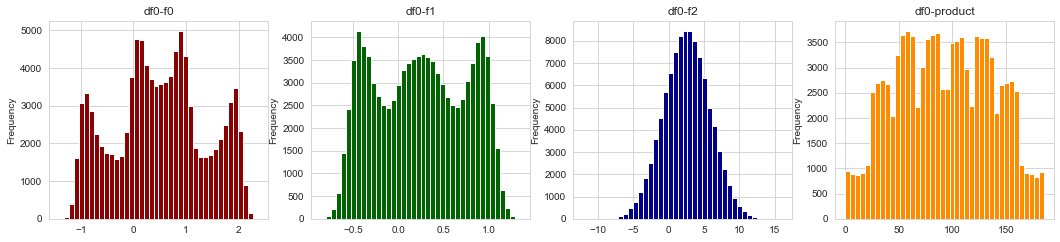

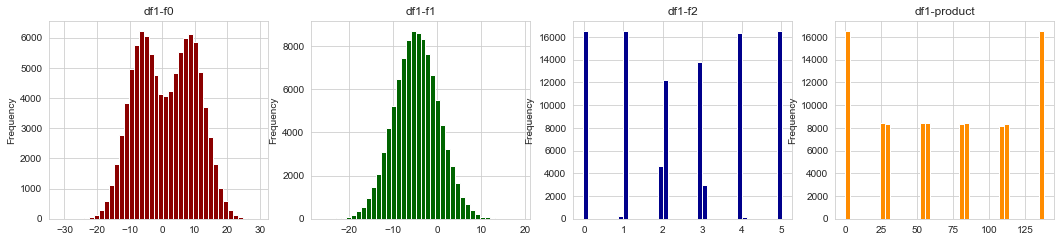

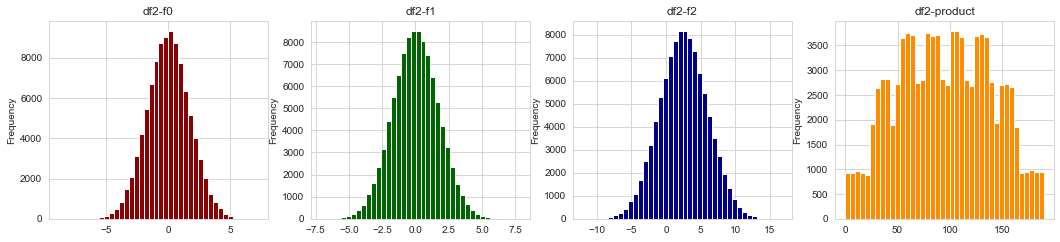

In [188]:
plt.figure(figsize=(6, 4))
fig = plt.figure(figsize=(18,8) )
ax1 = plt.subplot2grid((2,4),(0,0))
df0['f0'].plot(kind='hist', bins=40, color='darkred', title='df0-f0')
ax1 = plt.subplot2grid((2,4),(0,1))
df0['f1'].plot(kind='hist', bins=40,  color='darkgreen', title='df0-f1')
ax1 = plt.subplot2grid((2,4),(0,2))
df0['f2'].plot(kind='hist', bins=40,  color='darkblue', title='df0-f2')
ax1 = plt.subplot2grid((2,4),(0,3))
df0['product'].plot(kind='hist', bins=40,  color='darkorange', title='df0-product')
plt.show


fig = plt.figure(figsize=(18,8) )
ax1 = plt.subplot2grid((2,4),(0,0))
df1['f0'].plot(kind='hist', bins=40, color='darkred', title='df1-f0')
ax1 = plt.subplot2grid((2,4),(0,1))
df1['f1'].plot(kind='hist', bins=40,  color='darkgreen', title='df1-f1')
ax1 = plt.subplot2grid((2,4),(0,2))
df1['f2'].plot(kind='hist', bins=40,  color='darkblue', title='df1-f2')
ax1 = plt.subplot2grid((2,4),(0,3))
df1['product'].plot(kind='hist', bins=40,  color='darkorange', title='df1-product')
plt.show

fig = plt.figure(figsize=(18,8) )
ax1 = plt.subplot2grid((2,4),(0,0))
df2['f0'].plot(kind='hist', bins=40, color='darkred', title='df2-f0')
ax1 = plt.subplot2grid((2,4),(0,1))
df2['f1'].plot(kind='hist', bins=40,  color='darkgreen', title='df2-f1')
ax1 = plt.subplot2grid((2,4),(0,2))
df2['f2'].plot(kind='hist', bins=40,  color='darkblue', title='df2-f2')
ax1 = plt.subplot2grid((2,4),(0,3))
df2['product'].plot(kind='hist', bins=40,  color='darkorange', title='df2-product')
plt.show

Исходя из графиков, мы можем заметить, что большинство распределений в датафреймах представлены ненормальным распределением. \
Посчитаем коэффициент корреляции методом Спирмена.

# 3. Обучение модели и её проверка

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

raw_materials_mean_stock= 92.49999999999976 ; well_mean_product_stocks= 92.59285819581818 ; RMSE= 37.76023879156018


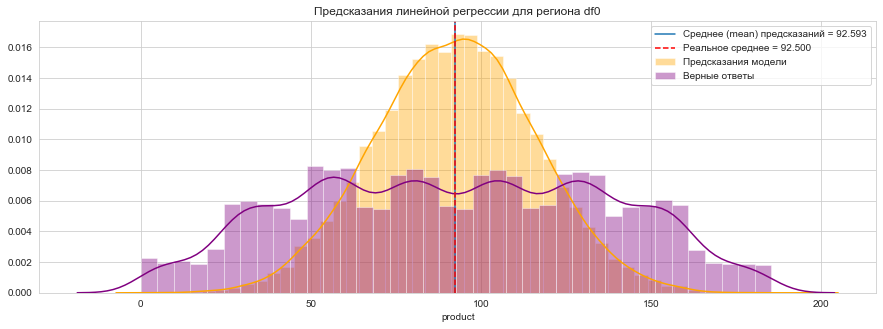

raw_materials_mean_stock= 68.82500000002561 ; well_mean_product_stocks= 68.60309883597067 ; RMSE= 0.8908254316670086


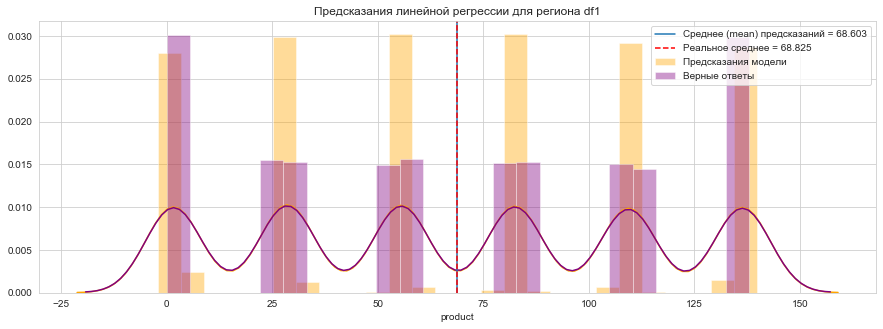

raw_materials_mean_stock= 95.00000000000041 ; well_mean_product_stocks= 94.78885362076424 ; RMSE= 40.24237823959256


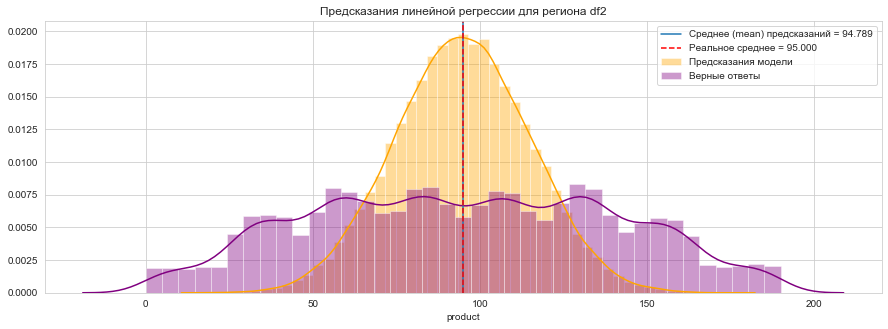

In [190]:
df_model = []
for i in range(0,3):
    X = df[i].drop(['product'],axis=1)
    y = df[i]['product']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    prediction = linreg.predict(X_test)
    raw_mat = df[i]['product']
    print('raw_materials_mean_stock=', raw_mat.mean(), '; well_mean_product_stocks=', prediction.mean(), '; RMSE=', np.sqrt(mean_squared_error(y_test, prediction)))
    df[i]['product_forecast'] = linreg.predict(df[i].drop(['product'], axis=1)) 
    df_model.append(df[i].loc[y_test.index])
    
    plt.figure(figsize=(15,5))
    sns.distplot(prediction, label='Предсказания модели', color='orange')
    sns.distplot(y_test, label='Верные ответы', color='purple')
    plt.axvline(df[i]['product'].mean(), label=f'Среднее (mean) предсказаний = {prediction.mean():.3f}')
    plt.axvline(raw_mat.mean(), label=f'Реальное среднее = {raw_mat.mean():.3f}', c='red', ls='--')
    plt.legend()
    plt.title(f'Предсказания линейной регрессии для региона df{i}')
    plt.show()

Исходя из данных графиков, мы видим, что:\
1) предсказание линейной регрессии для региона df0 имеет нормальное распределение с мат.ожиданием практически точно совпадающем с мат.ожиданием реального среднего.\
И можно сказать, что наша модель предсказывает значения в более узком диапазоне (размах у верных ответов гораздо больше). \
2) предсказание линейной регрессии для региона df1 и df2 также имеют выраженное нормальное распределение

Итак, мы построили модель на основе линейной регрессии для каждого из 3 регионов. \
Затем мы вычислили среднее прогноза объема запасов сырья и RMSE модели по каждому региону. \
На графиках явно заметно, что самое низкое среднеквадратичное отклонение у 1-го региона (rmse=0.89), что гораздо ниже в сравнении с 0 и 2 регионом (rmse_df0 = 37.76 & rmse_df2=40.24). Это означает, что наша моделька предсказывает запасы весьма точно. \
Однако и объем запасов (raw_materials_mean_stock) в 1 регионе также ниже - 68,825, в сравненении с 0 и 2 регионом (92,499 и 95,000 соответственно).

# 3. Подготовка к расчёту выручки -  revenue

In [143]:
total_budget = 10000000000
well_cost = 50000000 # косты - 50 млн, т.к. бюджет 10 млрд. на разработку 200 скважин
wells_count = int(total_budget/well_cost) 
oil_cost = 4500*1000 # - тысяча баррелей нефти

In [144]:
def revenue(target, forecast, count):
    probs_sorted = forecast.sort_values(ascending=False)
    selected = target[probs_sorted.index]
    return oil_cost * selected[:count].sum() - total_budget

In [145]:
print(wells_count) #скважин

200


In [146]:
min_avg_well_product = total_budget/(oil_cost*wells_count)

print("Минимально-необходимый средний объём запасов в месторождениях региона, тыс.баррелей: ",min_avg_well_product)
print("Средний объём запасов сырья в 0 регионе: ",df[0]['product'].mean())
print("Средний объём запасов сырья в 1 регионе: ",df[1]['product'].mean())
print("Средний объём запасов сырья в 2 регионе: ",df[2]['product'].mean())

Минимально-необходимый средний объём запасов в месторождениях региона, тыс.баррелей:  11.11111111111111
Средний объём запасов сырья в 0 регионе:  92.49999999999976
Средний объём запасов сырья в 1 регионе:  68.82500000002561
Средний объём запасов сырья в 2 регионе:  95.00000000000041


# 4. Расчёт прибыли

In [147]:
state = np.random.RandomState(101)

In [161]:
for i in range(0,3):  
    values = []
    count=0
    for k in range(1000):
        target_subsample = df_model[i]['product'].sample(n=500, replace=False, random_state=state) #frac=1
        forecast_subsample = df_model[i]['product_forecast'][target_subsample.index] 
        
        revenue__est = revenue(target_subsample, forecast_subsample, wells_count)
        values.append(revenue__est)
        
        if revenue__est<0:
            count+=1 #на случай, если у нас есть убытки
      
    
    values = pd.Series(values)
    lower = values.quantile(0.025) #95%-ый доверительный интервал
    upper = values.quantile(0.975) 
    
    mean = values.mean()
    print('Средняя прибыль по региону №',i,':', mean)
    print('Доверительный интервал: от ',lower,' до ', upper) 
    print('Вероятность убытков: ', count/1000) 
    

Средняя прибыль по региону № 0 : 94178805838.86148
Доверительный интервал: от  89374091066.43137  до  99194120645.88202
Вероятность убытков:  0.0
Средняя прибыль по региону № 1 : 94265378781.39429
Доверительный интервал: от  90509441234.651  до  98137271123.09047
Вероятность убытков:  0.0
Средняя прибыль по региону № 2 : 93800065635.33723
Доверительный интервал: от  88753622377.9493  до  98885401252.61086
Вероятность убытков:  0.0


   Таким образом, при помощи метода Bootstrap мы перебрали 1000 выборок (500 месторождений), для которых затем мы вычислили прибыль (из 500 точек выбирается 200 с наилучшей оценкой запасов)
Выручка = oil_cost * selected[:count].sum() - total_budget, т.е. стоимость за 1000 баррелей умноженная на количество запасов (реальная стоимость запасов в 200 месторождениях) и минус общий бюджет на разработку скважин. 

По полученным нами 1000 оценкам прибыли вычисляется средняя, 95% доверительный интервал, а также вероятность убытков.

После проведенного исследования, мы видим, что вероятность убытков во всех регионах при разработанной модели и заданных условиях разработки - нулевая. Прибыль всегда положительная. 

  Вывод: Из 3х потенциальных регионов, полагается целесообразным выбрать регион №1, ибо он имеет наилучшую среднюю оценку прибыли - 94,366 млрд.руб. и наибольшую нижнюю границу доверительного интервала - 90,339 млрд. Очевидно, что данный результат получен вследствие значительно более точной модели, позволившей точнее предсказывать объёмы запасов по данным геологоразведки 500 месторождений и выбирать действительно более объёмные, учитывая тот факт, что средний объём месторождений в данном регионе значительно ниже, чем в аналогичных регионах 0 и 2).

